## 모델의 성능 개선하기
* IBM sample datasets
https://www.kaggle.com/blastchar/telco-customer-churn

* Demographic info: 
    * Gender, SeniorCitizen, Partner, Dependents
* Services subscribed: 
    * PhoneService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
* Customer account info:
    * CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

## 데이터 로드하기
* 전처리된 모델을 로드하기

In [24]:
# telco_feature 로드하기

df = pd.read_csv("data/telco_feature.csv")
df.shape

(7043, 50)

In [25]:
# customerID 를 인덱스로 설정하기

df = df.set_index("customerID")

In [26]:
# head 로 미리보기

df.head()

,Churn_bool,Dependents_bool,PhoneService_bool,gender_bool,Partner_bool,PaperlessBilling_bool,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,PaymentMethod_Bank transfer (automatic),...,tenure_group_0-20,tenure_group_20-40,tenure_group_40-60,tenure_group_60plus,InternetService_DSL,InternetService_Fiber optic,InternetService_No,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,False,False,False,False,True,True,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
5575-GNVDE,False,False,True,True,False,False,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
3668-QPYBK,True,False,True,True,False,True,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
7795-CFOCW,False,False,False,True,False,False,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0
9237-HQITU,True,False,True,False,False,True,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [27]:
# info 보기

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 49 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Churn_bool                               7043 non-null   bool 
 1   Dependents_bool                          7043 non-null   bool 
 2   PhoneService_bool                        7043 non-null   bool 
 3   gender_bool                              7043 non-null   bool 
 4   Partner_bool                             7043 non-null   bool 
 5   PaperlessBilling_bool                    7043 non-null   bool 
 6   DeviceProtection_No                      7043 non-null   int64
 7   DeviceProtection_No internet service     7043 non-null   int64
 8   DeviceProtection_Yes                     7043 non-null   int64
 9   PaymentMethod_Bank transfer (automatic)  7043 non-null   int64
 10  PaymentMethod_Credit card (automatic)    7043 non-null   int64

## 전처리

In [28]:
# df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [29]:
# 결측치를 채워주는 방법도 있지만 일단 제거하도록 합니다.


In [30]:
# Churn 빈도수 보기
df["Churn_bool"].value_counts()

False    5174
True     1869
Name: Churn_bool, dtype: int64

## 학습, 예측 데이터셋 나누기
### 학습, 예측에 사용할 컬럼

In [31]:
df.nunique()

Churn_bool                                 2
Dependents_bool                            2
PhoneService_bool                          2
gender_bool                                2
Partner_bool                               2
PaperlessBilling_bool                      2
DeviceProtection_No                        2
DeviceProtection_No internet service       2
DeviceProtection_Yes                       2
PaymentMethod_Bank transfer (automatic)    2
PaymentMethod_Credit card (automatic)      2
PaymentMethod_Electronic check             2
PaymentMethod_Mailed check                 2
StreamingMovies_No                         2
StreamingMovies_No internet service        2
StreamingMovies_Yes                        2
monthlycharges_group_0-30                  2
monthlycharges_group_30-70                 2
monthlycharges_group_70-99                 2
monthlycharges_group_99plus                2
totalcharges_group_0-2k                    2
totalcharges_group_2k-4k                   2
totalcharg

In [32]:
# 피처로 사용할 컬럼 지정하기
# feature_names


### 정답값이자 예측해야 될 값

In [33]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.

label_name = "Churn_bool"
label_name

'Churn_bool'

### 문제(feature)와 답안(label)을 나누기

* X, y를 만들어 줍니다.
* X는 feature, 독립변수, 예) 시험의 문제
* y는 label, 종속변수, 예) 시험의 정답

In [34]:
# X, y를 만들어 줍니다.

X = df.drop(label_name, axis=1)
y = df[label_name]

### 학습, 예측 데이터셋 만들기
* X_train : 학습 세트 만들기, 행렬, 판다스의 데이터프레임, 2차원 리스트(배열) 구조,  예) 시험의 기출문제
* y_train : 정답 값을 만들기, 벡터, 판다스의 시리즈, 1차원 리스트(배열) 구조, 예) 기출문제의 정답
* X_test : 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제
* y_test : 예측의 정답값 예) 실전 시험 문제의 정답

In [35]:
# train_test_split 으로 데이터셋 나누기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4718, 48), (2325, 48), (4718,), (2325,))

In [37]:
# X_train 미리보기

X_train.head()

,Dependents_bool,PhoneService_bool,gender_bool,Partner_bool,PaperlessBilling_bool,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),...,tenure_group_0-20,tenure_group_20-40,tenure_group_40-60,tenure_group_60plus,InternetService_DSL,InternetService_Fiber optic,InternetService_No,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
2985-JUUBZ,True,True,True,True,True,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
5016-ETTFF,False,False,True,False,False,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1998-VHJHK,False,True,False,False,False,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1925-TIBLE,False,True,False,True,True,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
0485-ZBSLN,True,True,True,True,False,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [38]:
# X_test 미리보기

X_test.head()

,Dependents_bool,PhoneService_bool,gender_bool,Partner_bool,PaperlessBilling_bool,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),...,tenure_group_0-20,tenure_group_20-40,tenure_group_40-60,tenure_group_60plus,InternetService_DSL,InternetService_Fiber optic,InternetService_No,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
1024-GUALD,False,False,False,True,True,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
0484-JPBRU,False,True,True,False,True,0,1,0,1,0,...,0,0,1,0,0,0,1,0,1,0
3620-EHIMZ,True,True,False,True,False,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6910-HADCM,False,True,False,False,False,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
8587-XYZSF,False,True,True,False,False,1,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0


In [39]:
# y_train 미리보기

y_train.head()

customerID
2985-JUUBZ    False
5016-ETTFF     True
1998-VHJHK    False
1925-TIBLE     True
0485-ZBSLN    False
Name: Churn_bool, dtype: bool

## 머신러닝 모델로 예측하기

In [47]:
# 트리모델 로드하기
 
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4, max_features=0.6)

In [48]:
# 학습하기

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=0.6)

In [49]:
# 예측하기

y_pred = model.predict(X_test)

## 모델 평가하기

In [50]:
# 피처의 중요도를 추출하기

model.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.17261201e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.04494965e-02, 0.00000000e+00, 8.06008713e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.28272888e-02, 0.00000000e+00, 0.00000000e+00, 5.99591688e-01,
       1.25725405e-02, 5.07198210e-03, 1.01219542e-01, 0.00000000e+00,
       4.79638768e-03, 0.00000000e+00, 0.00000000e+00, 1.85293726e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [51]:
feature_names = X_train.columns.tolist()
feature_names

['Dependents_bool',
 'PhoneService_bool',
 'gender_bool',
 'Partner_bool',
 'PaperlessBilling_bool',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'monthlycharges_group_0-30',
 'monthlycharges_group_30-70',
 'monthlycharges_group_70-99',
 'monthlycharges_group_99plus',
 'totalcharges_group_0-2k',
 'totalcharges_group_2k-4k',
 'totalcharges_group_4k-6k',
 'totalcharges_group_6kplus',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'Contract_Mont

In [52]:
df_importance = pd.DataFrame({"feature_names" : feature_names, "importance": model.feature_importances_})
df_importance = df_importance.sort_values("importance", ascending=False)

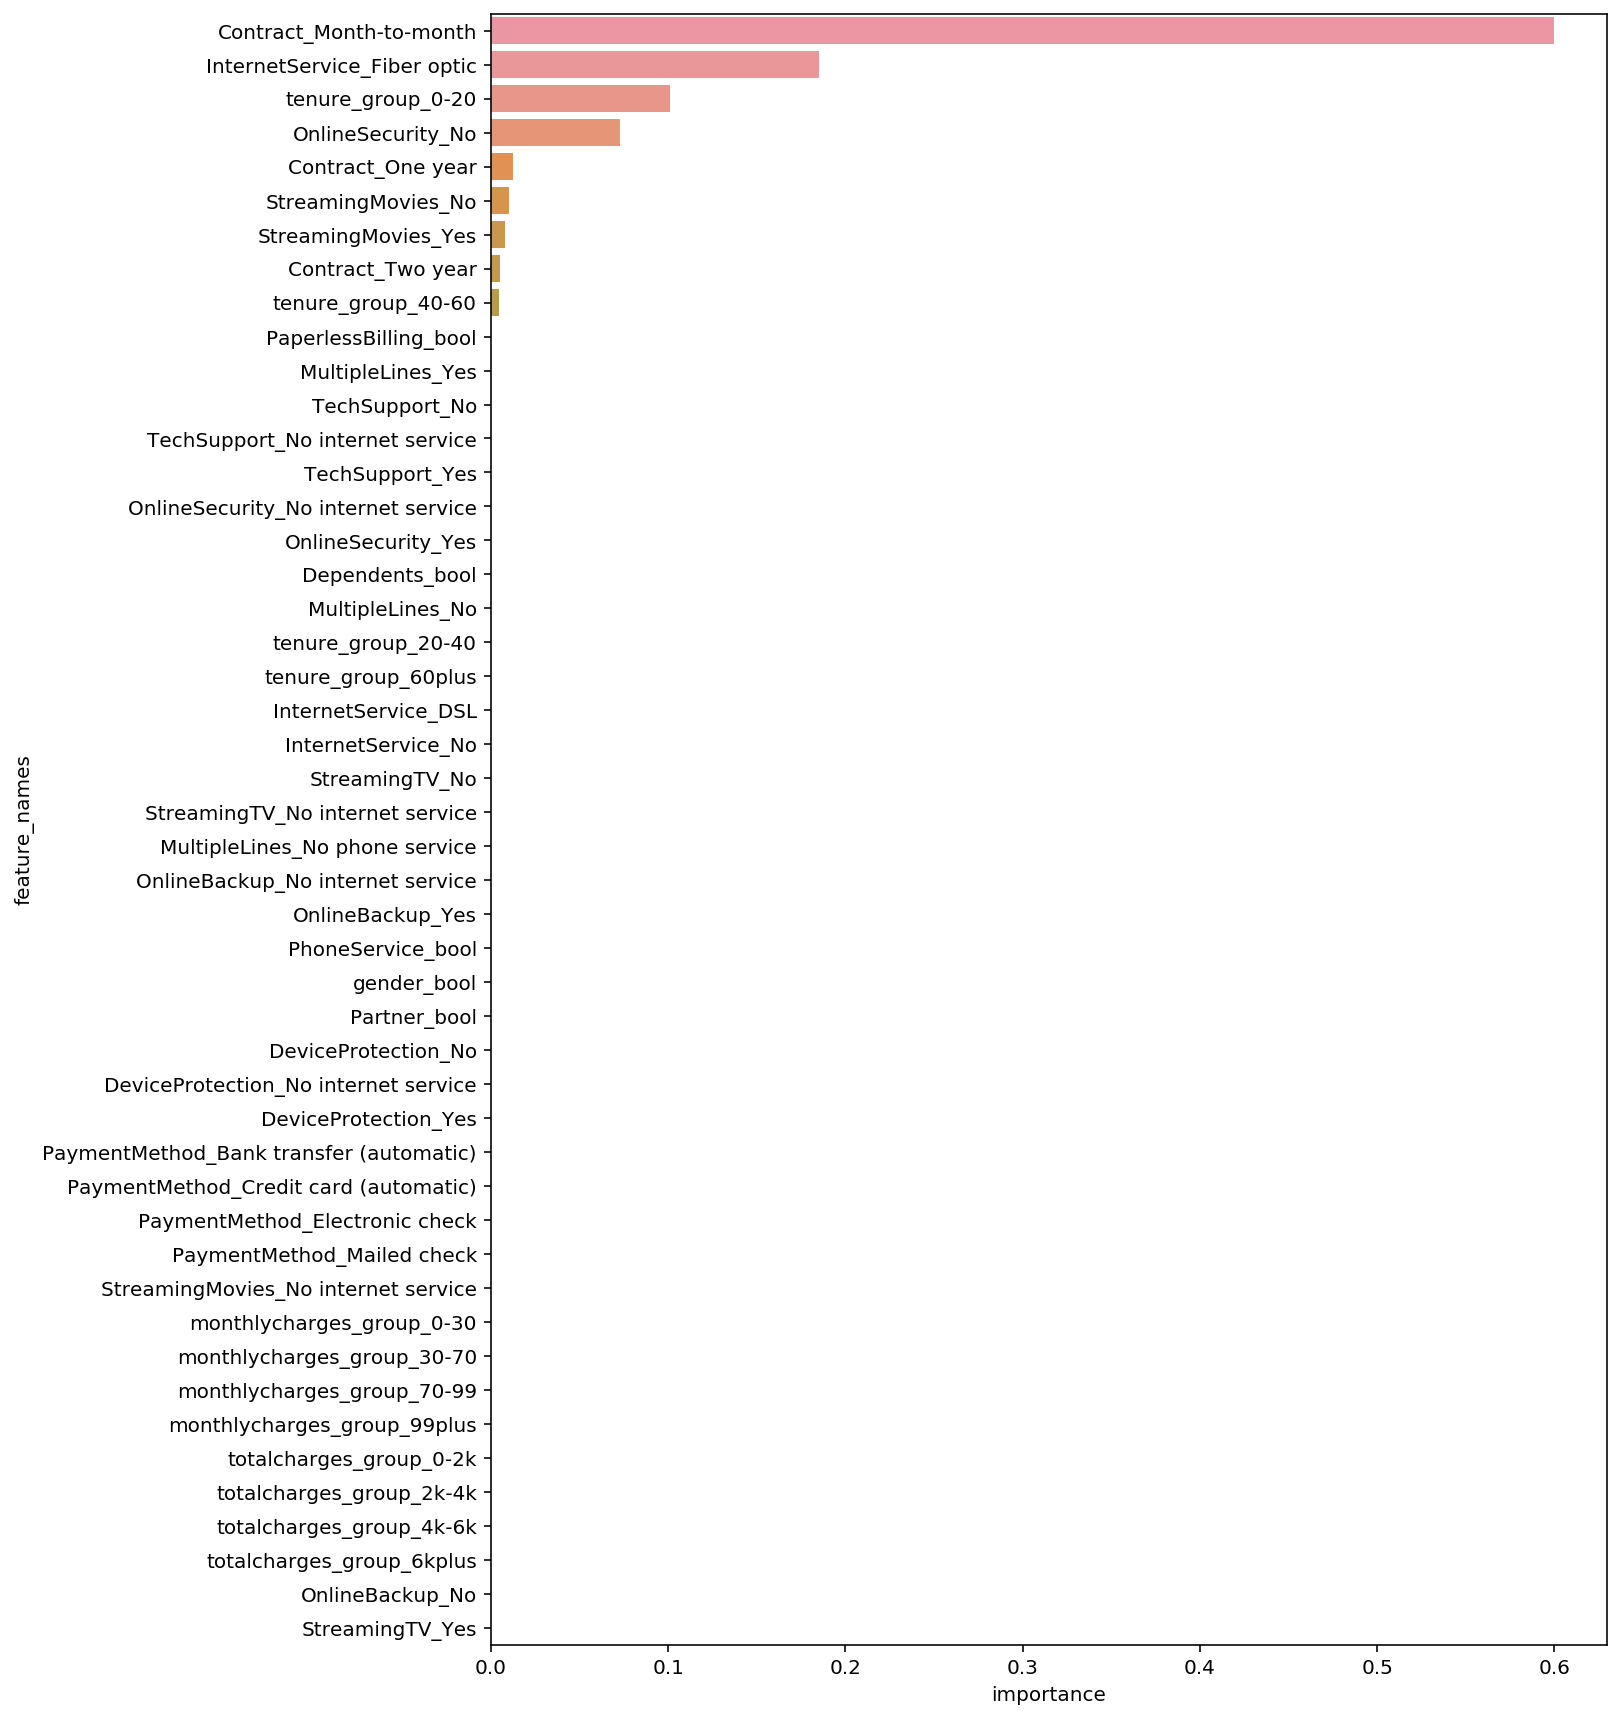

In [53]:
# 피처의 중요도 시각화 하기
plt.figure(figsize=(10, 15))
sns.barplot(data=df_importance, x="importance", y="feature_names")

### 점수 측정하기
#### Accuracy

In [54]:
y_testZ

customerID
1024-GUALD     True
0484-JPBRU    False
3620-EHIMZ    False
6910-HADCM     True
8587-XYZSF    False
              ...  
3836-FZSDJ    False
1301-LOPVR    False
7479-NITWS     True
3312-UUMZW    False
0060-FUALY    False
Name: Churn_bool, Length: 2325, dtype: bool

In [55]:
# accuracy
(y_test == y_pred).mean()

0.7974193548387096

In [56]:
# 직접 계산해 보기
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7974193548387096

#### F1 score
* precision 과 recall의 조화평균
* [정밀도와 재현율 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EB%B0%80%EB%8F%84%EC%99%80_%EC%9E%AC%ED%98%84%EC%9C%A8)

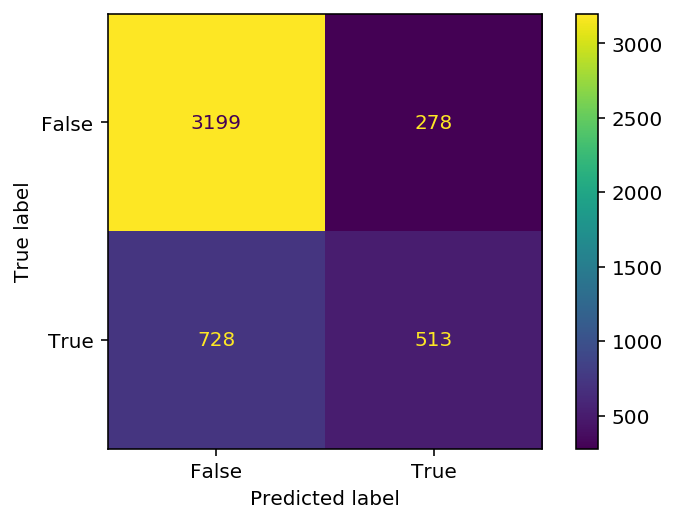

In [57]:
# plot_confusion_matrix 를 그립니다.

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_train, y_train)

In [58]:
# classification_report 를 출력합니다.

from sklearn.metrics import classification_report

r = classification_report(y_test, y_pred)
print(r)

              precision    recall  f1-score   support

       False       0.82      0.92      0.87      1697
        True       0.69      0.46      0.55       628

    accuracy                           0.80      2325
   macro avg       0.75      0.69      0.71      2325
weighted avg       0.79      0.80      0.78      2325

